         id Basic_Demos-Enroll_Season  Basic_Demos-Age  Basic_Demos-Sex  \
0  83711ef5                      Fall               15                1   
1  93c93585                      Fall               10                0   
2  81feecad                    Summer               10                0   
3  fbbd97b1                    Spring               14                1   
4  35198c2d                    Spring               17                0   

  CGAS-Season  CGAS-CGAS_Score Physical-Season  Physical-BMI  Physical-Height  \
0      Winter             65.0          Winter     24.058222            60.00   
1      Winter             60.0            Fall     14.147192            53.50   
2      Winter             61.0            Fall      0.000000            50.50   
3      Summer             62.0          Summer     15.671954            63.75   
4        Fall             60.0          Summer     21.453434            72.00   

   Physical-Weight  ...  PAQ_A-PAQ_A_Total  PAQ_C-Season  PAQ_

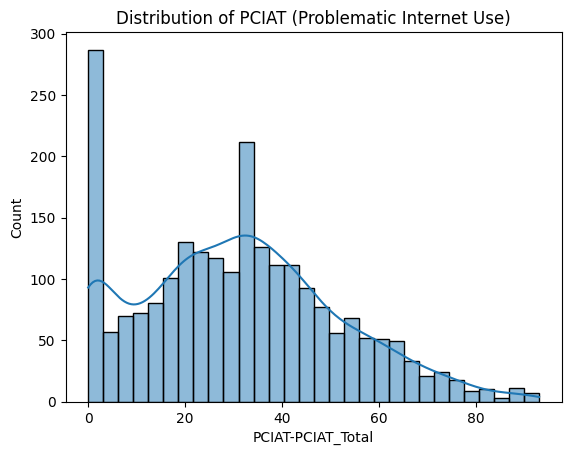

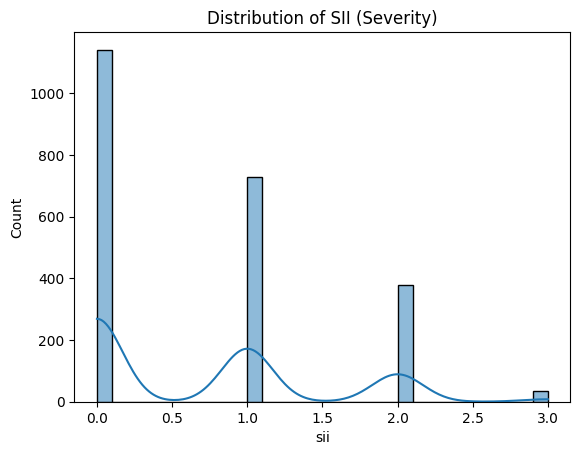

count    2284.000000
mean       30.759632
std        20.576780
min         0.000000
25%        16.000000
50%        30.500000
75%        44.000000
max        93.000000
Name: PCIAT-PCIAT_Total, dtype: float64
count    2284.000000
mean        0.695271
std         0.795274
min         0.000000
25%         0.000000
50%         0.500000
75%         1.000000
max         3.000000
Name: sii, dtype: float64


In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path = '/content/balanced_sheet.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

import matplotlib.pyplot as plt
import seaborn as sns

# Plotting distribution for PCIAT
sns.histplot(data['PCIAT-PCIAT_Total'], bins=30, kde=True)
plt.title('Distribution of PCIAT (Problematic Internet Use)')
plt.show()

# Plotting distribution for SII
sns.histplot(data['sii'], bins=30, kde=True)
plt.title('Distribution of SII (Severity)')
plt.show()

# Summary statistics
print(data['PCIAT-PCIAT_Total'].describe())
print(data['sii'].describe())


In [ ]:
# Define thresholds based on percentiles
low_piu = 16  # 25th percentile
moderate_piu = 30.5  # Median (50th percentile)
high_piu = 44  # 75th percentile

# Create a new column for PIU categories
data['PIU_Category'] = pd.cut(data['PCIAT-PCIAT_Total'],
                              bins=[-float('inf'), low_piu, moderate_piu, high_piu, float('inf')],
                              labels=['Low', 'Moderate', 'High', 'Very High'])

# Display the distribution of categories
print(data['PIU_Category'].value_counts())


PIU_Category
High         596
Low          592
Moderate     550
Very High    546
Name: count, dtype: int64


In [ ]:
#Data Preparation
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/balanced_sheet.csv')

# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# Identify numeric columns
numeric_cols = data.select_dtypes(include=['float64', 'int']).columns

# Handling missing values: impute numeric columns with mean
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# For non-numeric columns, you can choose to fill with mode or drop them
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)  # Filling categorical columns with mode

# Check for missing values again to ensure they're handled
missing_values_after = data.isnull().sum()
print("Missing Values After Handling:\n", missing_values_after)

# Check for outliers using Z-score method
z_scores = stats.zscore(data[numeric_cols])
abs_z_scores = abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)  # Keeping entries with Z-score < 3
data = data[filtered_entries]

# Display shape of cleaned data
print("Shape of Data After Cleaning:", data.shape)


Missing Values:
 id                                           0
Basic_Demos-Enroll_Season                    0
Basic_Demos-Age                              0
Basic_Demos-Sex                              0
CGAS-Season                                335
CGAS-CGAS_Score                            335
Physical-Season                            124
Physical-BMI                               180
Physical-Height                            179
Physical-Weight                            145
Physical-Waist_Circumference              1880
Physical-Diastolic_BP                      226
Physical-HeartRate                         215
Physical-Systolic_BP                       226
Fitness_Endurance-Season                  1263
Fitness_Endurance-Max_Stage               1697
Fitness_Endurance-Time_Mins               1700
Fitness_Endurance-Time_Sec                1700
FGC-Season                                  76
FGC-FGC_CU                                 694
FGC-FGC_CU_Zone                            

<ipython-input-4-d5bcc790e19b>:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)  # Filling categorical columns with mode


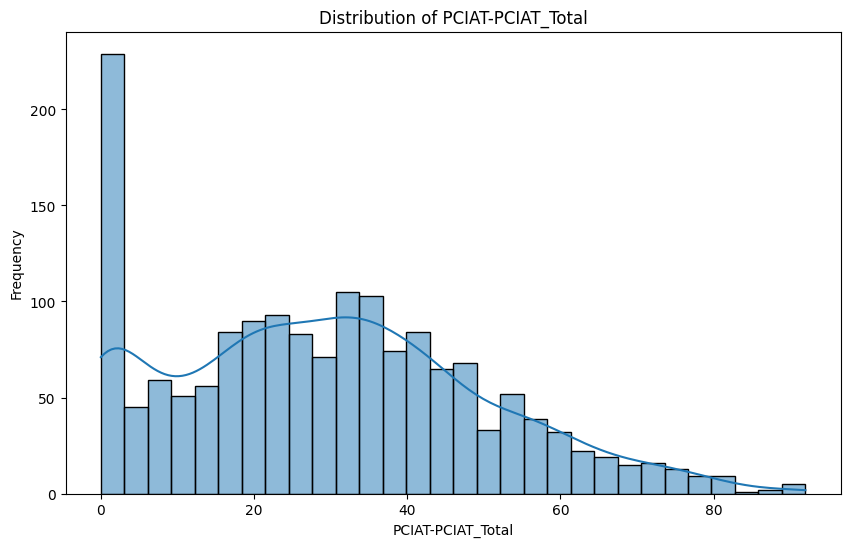

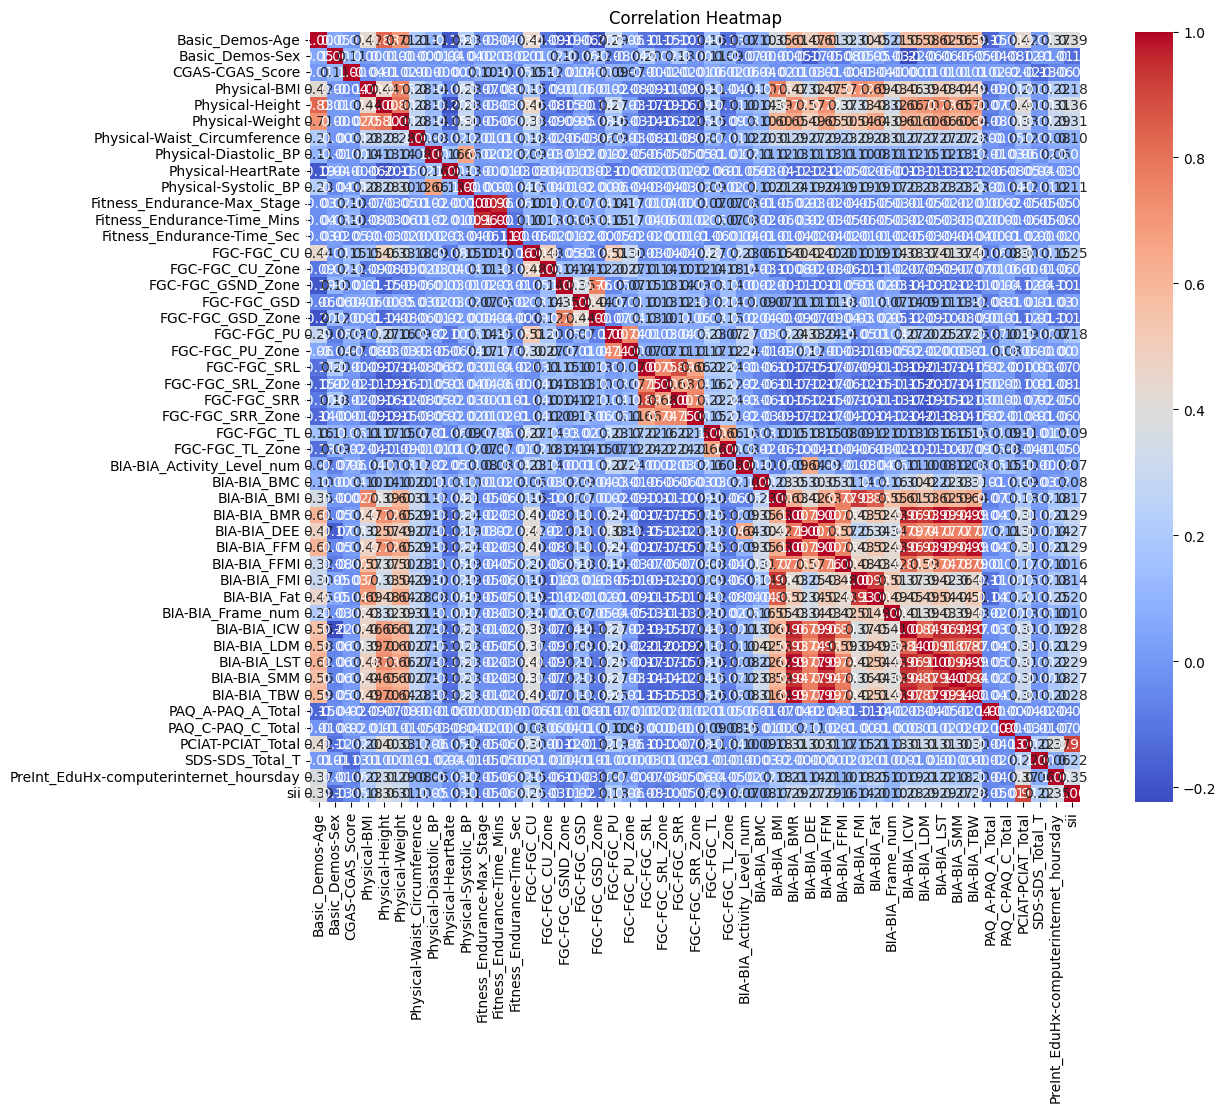

In [ ]:
# Visualize the distribution of the target variable PCIAT-PCIAT_Total
plt.figure(figsize=(10, 6))
sns.histplot(data['PCIAT-PCIAT_Total'], bins=30, kde=True)
plt.title('Distribution of PCIAT-PCIAT_Total')
plt.xlabel('PCIAT-PCIAT_Total')
plt.ylabel('Frequency')
plt.show()

# Calculate correlation matrix
correlation_matrix = data[numeric_cols].corr()

# Plot heatmap of correlations
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
import pandas as pd

# Load your dataset
data = pd.read_csv('/content/balanced_sheet.csv')  # Adjust the path accordingly

# Drop the 'sii' column
data = data.drop(columns=['sii'])

# Identify non-numeric columns
non_numeric_columns = data.select_dtypes(exclude=['number']).columns.tolist()
print("Non-numeric columns:", non_numeric_columns)

# Option 1: Drop non-numeric columns
data_numeric = data.drop(columns=non_numeric_columns)

# Option 2: If you want to convert specific columns to numeric, uncomment the below line (use with caution)
# data[non_numeric_columns] = data[non_numeric_columns].apply(pd.to_numeric, errors='coerce')

# Calculate the correlation matrix
correlation_matrix = data_numeric.corr()

# Select and sort correlations with 'PCIAT-PCIAT_Total'
pciat_correlations = correlation_matrix['PCIAT-PCIAT_Total']
significant_correlations = pciat_correlations[abs(pciat_correlations) > 0]  # Adjust threshold if necessary
sorted_correlations = significant_correlations.sort_values(ascending=False)  # Sort from high to low

# Print the sorted values
print(sorted_correlations)


Non-numeric columns: ['id', 'Basic_Demos-Enroll_Season', 'CGAS-Season', 'Physical-Season', 'Fitness_Endurance-Season', 'FGC-Season', 'BIA-Season', 'PAQ_A-Season', 'PAQ_C-Season', 'PCIAT-Season', 'SDS-Season', 'PreInt_EduHx-Season']
PCIAT-PCIAT_Total                         1.000000
Physical-Height                           0.427704
Basic_Demos-Age                           0.416767
PreInt_EduHx-computerinternet_hoursday    0.371247
Physical-Weight                           0.362664
Physical-Waist_Circumference              0.316331
FGC-FGC_CU                                0.282226
BIA-BIA_BMI                               0.270283
Physical-BMI                              0.259799
SDS-SDS_Total_T                           0.248337
BIA-BIA_Frame_num                         0.218549
FGC-FGC_PU                                0.191366
FGC-FGC_GSD                               0.181874
FGC-FGC_TL                                0.160893
Physical-Systolic_BP                      0.135446
BIA

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load your data
data = pd.read_csv('/content/balanced_sheet.csv')  # Update this with your dataset

# Define the target variable
target = data['PCIAT-PCIAT_Total']

# Select features and identify categorical columns
features = data.drop(columns=['PCIAT-PCIAT_Total', 'sii', 'id'])  # Exclude id and target
categorical_cols = features.select_dtypes(include=['object']).columns.tolist()

# Define preprocessing for categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'  # Keep other features as they are
)

# Create a pipeline that first transforms the features and then fits the model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('stacked_model', StackingRegressor(
        estimators=[
            ('xgb', XGBRegressor()),
            ('rf', RandomForestRegressor())
        ],
        final_estimator=MLPRegressor(max_iter=500)
    ))
])

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train the pipeline
pipeline.fit(X_train, y_train)

# Predictions
predictions = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error of the Hybrid Model: {mse}')

# Custom accuracy calculation
tolerance = 5  # Define acceptable error tolerance
within_tolerance = (abs(y_test - predictions) <= tolerance)
accuracy_within_tolerance = (within_tolerance.mean()) * 100  # Convert to percentage

print(f'Percentage of predictions within {tolerance} units: {accuracy_within_tolerance:.2f}%')


Mean Squared Error of the Hybrid Model: 326.40440920799387
Percentage of predictions within 5 units: 22.76%


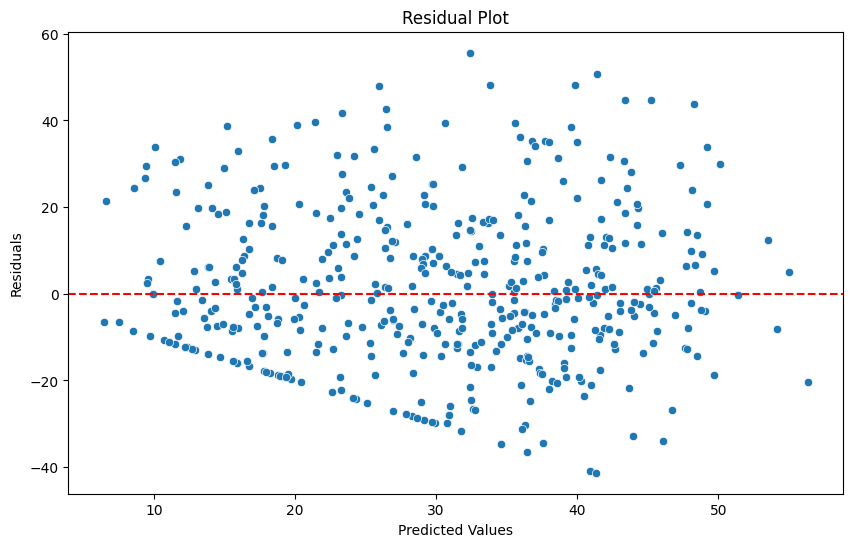

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

residuals = y_test - predictions

plt.figure(figsize=(10, 6))
sns.scatterplot(x=predictions, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


Feature Importances:
remainder__Basic_Demos-Age: 0.16276659546705055
remainder__SDS-SDS_Total_T: 0.10215136562532676
remainder__PreInt_EduHx-computerinternet_hoursday: 0.06443754982732855
remainder__Physical-Height: 0.0392821387885024
remainder__CGAS-CGAS_Score: 0.037165853826546004
remainder__Physical-HeartRate: 0.03423883372466189
remainder__PAQ_C-PAQ_C_Total: 0.031953581366946454
remainder__Physical-Systolic_BP: 0.031019941304884467
remainder__Physical-Weight: 0.027021634037841483
remainder__Physical-BMI: 0.0262059273539143
remainder__Physical-Diastolic_BP: 0.02593124135003373
remainder__BIA-BIA_BMC: 0.020753825333517537
remainder__FGC-FGC_CU: 0.019359277847342864
remainder__BIA-BIA_DEE: 0.018848415528075316
remainder__BIA-BIA_LDM: 0.018709197441000143
remainder__BIA-BIA_SMM: 0.01806259610079698
remainder__FGC-FGC_TL: 0.01761359546796461
remainder__FGC-FGC_SRR: 0.015868523052346914
remainder__FGC-FGC_SRL: 0.015077937282007146
remainder__FGC-FGC_PU: 0.014345265456607519
remainder__BI

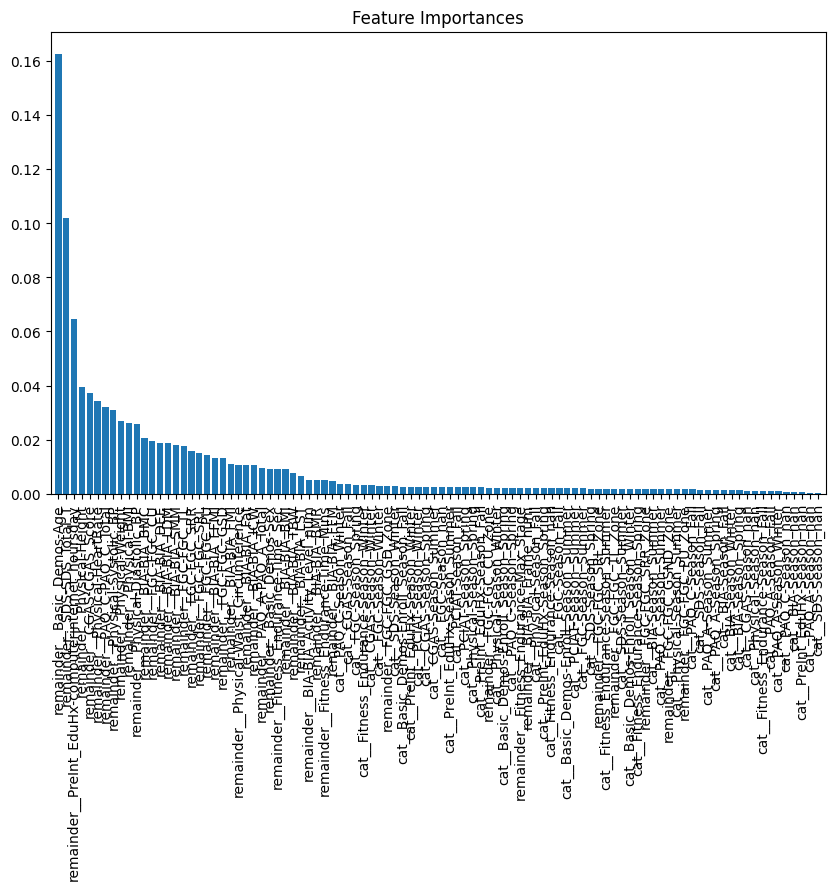

In [ ]:
#Random Forest model for feature importance
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

# Assuming preprocessor, X_train, and y_train are already defined

# Fit the preprocessing on the full training set
X_train_transformed = preprocessor.fit_transform(X_train)

# Fit a Random Forest model for feature importance
rf_model = RandomForestRegressor()
rf_model.fit(X_train_transformed, y_train)

# Get feature importances
importances = rf_model.feature_importances_
feature_names = np.array(preprocessor.get_feature_names_out())

# Sort features by importance
indices = np.argsort(importances)[::-1]

# Print the feature importances
print("Feature Importances:")
for i in indices:
    print(f"{feature_names[i]}: {importances[i]}")

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(X_train_transformed.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train_transformed.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X_train_transformed.shape[1]])
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load your data
data = pd.read_csv('/content/balanced_sheet.csv')  # Update this with your dataset

# Define the target variable
target = data['PCIAT-PCIAT_Total']

# Select features and identify categorical columns
features = data.drop(columns=['PCIAT-PCIAT_Total', 'sii', 'id'])  # Exclude id and target
categorical_cols = features.select_dtypes(include=['object']).columns.tolist()

# Define preprocessing for categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'  # Keep other features as they are
)

# Create a pipeline that first transforms the features and then fits the Random Forest model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('rf_model', RandomForestRegressor())
])

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train the pipeline
pipeline.fit(X_train, y_train)

# Predictions
predictions = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error of the Random Forest Model: {mse}')

# Custom accuracy calculation
tolerance = 5  # Define acceptable error tolerance
within_tolerance = (abs(y_test - predictions) <= tolerance)
accuracy_within_tolerance = (within_tolerance.mean()) * 100  # Convert to percentage

print(f'Percentage of predictions within {tolerance} units: {accuracy_within_tolerance:.2f}%')

# Additional evaluation metrics
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, predictions)
r_squared = r2_score(y_test, predictions)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R²): {r_squared}')


Mean Squared Error of the Random Forest Model: 322.87849020787746
Percentage of predictions within 5 units: 22.98%
Mean Absolute Error (MAE): 14.307078774617066
R-squared (R²): 0.2661376689161504


Mean Squared Error of the Random Forest Model: 320.9167835946997


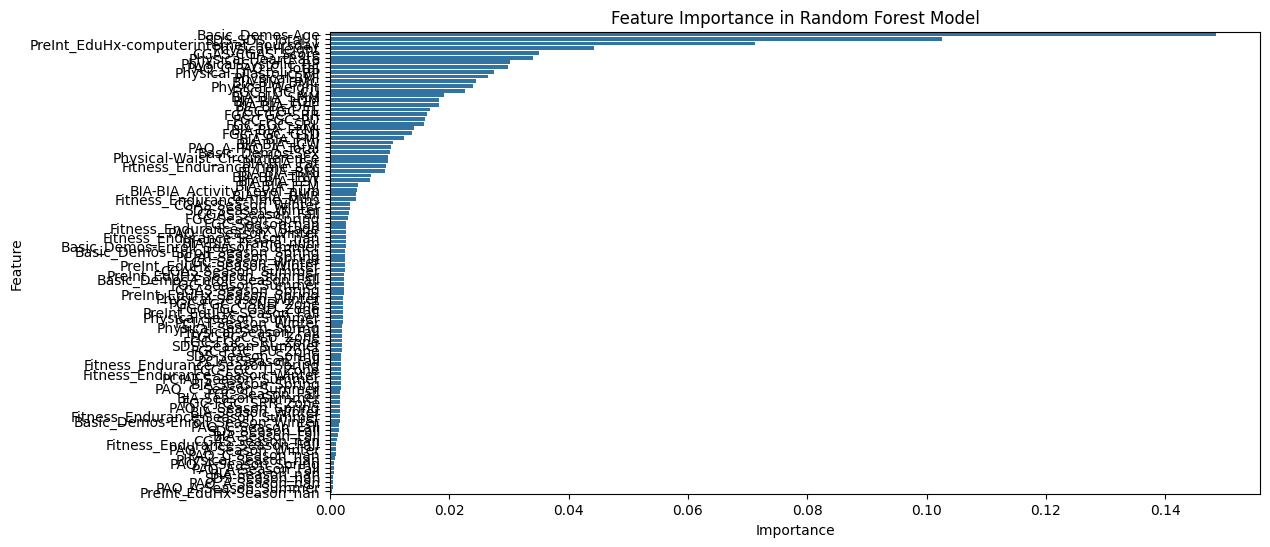

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load your data
data = pd.read_csv('/content/balanced_sheet.csv')  # Update this with your dataset

# Define the target variable
target = data['PCIAT-PCIAT_Total']

# Select features and identify categorical columns
features = data.drop(columns=['PCIAT-PCIAT_Total', 'sii', 'id'])  # Exclude id and target
categorical_cols = features.select_dtypes(include=['object']).columns.tolist()

# Define preprocessing for categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'  # Keep other features as they are
)

# Create a pipeline for the Random Forest model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('rf_model', RandomForestRegressor(random_state=42))
])

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train the pipeline
pipeline.fit(X_train, y_train)

# Evaluate the model
predictions = pipeline.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error of the Random Forest Model: {mse}')

# Feature Importance (using the fitted Random Forest model)
rf_model = pipeline.named_steps['rf_model']
feature_names = pipeline.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out(categorical_cols)
all_feature_names = list(feature_names) + list(features.drop(columns=categorical_cols).columns)
importance = rf_model.feature_importances_

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance in Random Forest Model')
plt.show()


Mean Squared Error of the Random Forest Model: 320.9167835946997
Root Mean Squared Error (RMSE): 17.91415037323009
Mean Absolute Error (MAE): 14.212629467541941
R-squared (R²): 0.27059638212161163


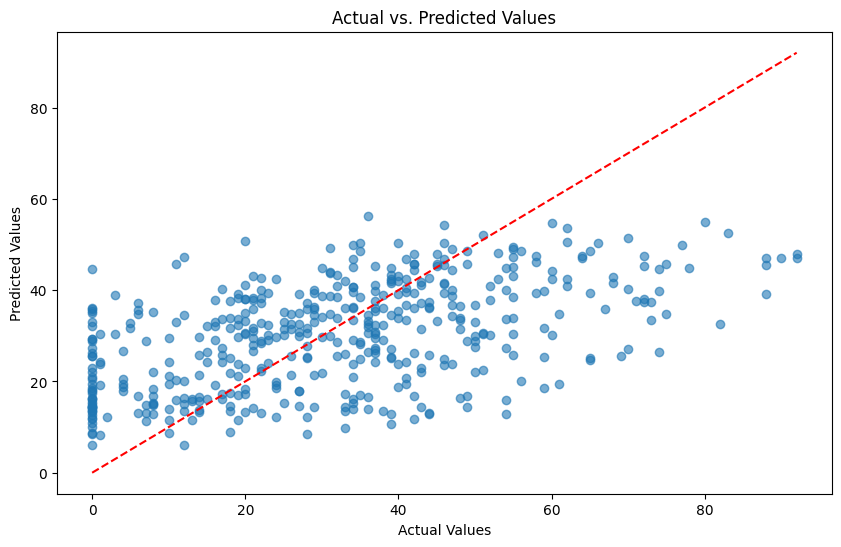

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

# Predictions
predictions = pipeline.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, predictions)
rmse = mse ** 0.5  # Root Mean Squared Error
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Print evaluation metrics
print(f'Mean Squared Error of the Random Forest Model: {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R²): {r2}')

# Visualize predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load your data
data = pd.read_csv('/content/balanced_sheet.csv')  # Update this with your dataset

# Define the target variable
target = data['PCIAT-PCIAT_Total']

# Select features and identify categorical columns
features = data.drop(columns=['PCIAT-PCIAT_Total', 'sii', 'id'])  # Exclude id and target
categorical_cols = features.select_dtypes(include=['object']).columns.tolist()

# Define preprocessing for categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'  # Keep other features as they are
)

# Create a pipeline that first transforms the features and then fits the model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('rf_model', RandomForestRegressor(random_state=42))
])

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train the pipeline
pipeline.fit(X_train, y_train)

# Access the Random Forest model from the pipeline
rf_model = pipeline.named_steps['rf_model']

# Check if the model is fitted and then get feature importances
if hasattr(rf_model, 'feature_importances_'):
    # Get the preprocessor's feature names after one-hot encoding
    onehot_encoder = pipeline.named_steps['preprocessor'].transformers_[0][1]

    # Correctly retrieve feature names
    feature_names = onehot_encoder.get_feature_names_out(input_features=categorical_cols).tolist() + \
                    features.select_dtypes(exclude=['object']).columns.tolist()

    importances = rf_model.feature_importances_

    # Create the feature importance DataFrame
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

    print(feature_importance_df)
else:
    print("The model has not been fitted or does not have feature importances.")


                                   Feature  Importance
53                         Basic_Demos-Age    0.148479
96                         SDS-SDS_Total_T    0.102566
97  PreInt_EduHx-computerinternet_hoursday    0.071212
57                         Physical-Height    0.044310
55                         CGAS-CGAS_Score    0.034962
..                                     ...         ...
28                          BIA-Season_nan    0.000607
47                          SDS-Season_nan    0.000542
33                        PAQ_A-Season_nan    0.000506
31                     PAQ_A-Season_Summer    0.000469
52                 PreInt_EduHx-Season_nan    0.000380

[98 rows x 2 columns]


In [ ]:
# Define the number of top features to keep
top_n_features = 10  # Adjust this number based on your preference

# Select the top features based on importance
selected_features = feature_importance_df['Feature'][:top_n_features].values

# Create a new DataFrame with only the selected features
X_selected = features[selected_features]

# Split the dataset again with the selected features
X_train_selected, X_test_selected, y_train, y_test = train_test_split(X_selected, target, test_size=0.2, random_state=42)


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define the Random Forest model
rf_model_tuned = RandomForestRegressor(random_state=42)

# Set up the parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Set up the RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_model_tuned, param_distributions=param_grid,
                                   n_iter=50, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the model
random_search.fit(X_train_selected, y_train)

# Best parameters found
best_rf_model = random_search.best_estimator_
print(f'Best Parameters: {random_search.best_params_}')


Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
75 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

Best Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10}


In [ ]:
# Predictions using the best model
predictions_tuned = best_rf_model.predict(X_test_selected)

# Evaluate the tuned model
mse_tuned = mean_squared_error(y_test, predictions_tuned)
rmse_tuned = mse_tuned ** 0.5
mae_tuned = mean_absolute_error(y_test, predictions_tuned)
r2_tuned = best_rf_model.score(X_test_selected, y_test)

print(f'Mean Squared Error of the Tuned Random Forest Model: {mse_tuned}')
print(f'Root Mean Squared Error (RMSE): {rmse_tuned}')
print(f'Mean Absolute Error (MAE): {mae_tuned}')
print(f'R-squared (R²): {r2_tuned}')


Mean Squared Error of the Tuned Random Forest Model: 320.9970625198642
Root Mean Squared Error (RMSE): 17.916390889904815
Mean Absolute Error (MAE): 14.311210038690605
R-squared (R²): 0.27041391818875504


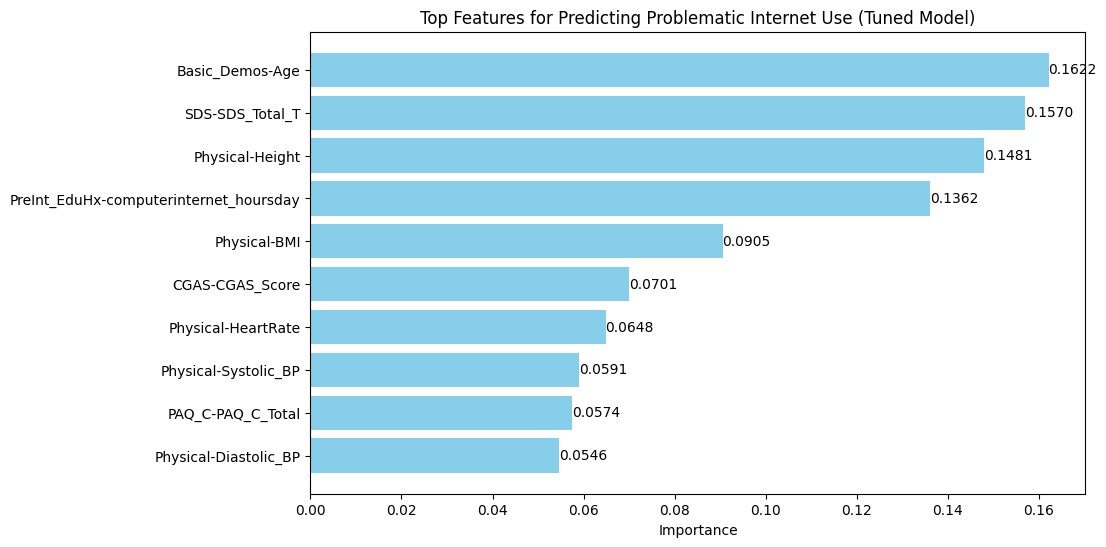

In [ ]:
import matplotlib.pyplot as plt

# Calculate the importances using the best model
importances_tuned = best_rf_model.feature_importances_

# Create a DataFrame for visualization
feature_importance_df_tuned = pd.DataFrame({'Feature': selected_features, 'Importance': importances_tuned})
feature_importance_df_tuned.sort_values(by='Importance', ascending=False, inplace=True)

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.barh(feature_importance_df_tuned['Feature'], feature_importance_df_tuned['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Top Features for Predicting Problematic Internet Use (Tuned Model)')
plt.gca().invert_yaxis()  # Reverse the y-axis to have the most important feature at the top

# Adding importance values on the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.4f}', va='center')

plt.show()


Feature Importances:
Basic_Demos-Age: 0.1622
SDS-SDS_Total_T: 0.1570
Physical-Height: 0.1481
PreInt_EduHx-computerinternet_hoursday: 0.1362
Physical-BMI: 0.0905
CGAS-CGAS_Score: 0.0701
Physical-HeartRate: 0.0648
Physical-Systolic_BP: 0.0591
PAQ_C-PAQ_C_Total: 0.0574
Physical-Diastolic_BP: 0.0546


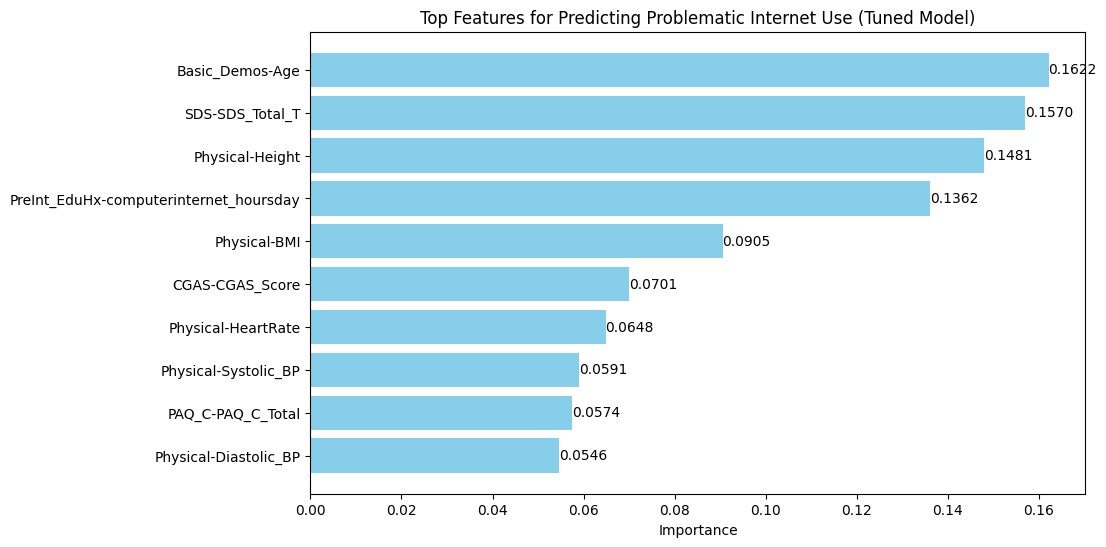

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the importances using the best model
importances_tuned = best_rf_model.feature_importances_

# Create a DataFrame for visualization
feature_importance_df_tuned = pd.DataFrame({'Feature': selected_features, 'Importance': importances_tuned})
feature_importance_df_tuned.sort_values(by='Importance', ascending=False, inplace=True)

# Print the feature importances separately
print("Feature Importances:")
for index, row in feature_importance_df_tuned.iterrows():
    print(f"{row['Feature']}: {row['Importance']:.4f}")

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.barh(feature_importance_df_tuned['Feature'], feature_importance_df_tuned['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Top Features for Predicting Problematic Internet Use (Tuned Model)')
plt.gca().invert_yaxis()  # Reverse the y-axis to have the most important feature at the top

# Adding importance values on the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.4f}', va='center')

plt.show()


**Interpretation** of Significant Features
Basic_Demos-Age (Importance: 0.1622):

**Interpretation**: Age is a critical factor in understanding PIU. Younger individuals, especially children and teens, are often more susceptible to internet addiction due to their developmental stage and social influences. As age increases, the way individuals interact with technology can change, affecting their internet use patterns.
Underlying Trends: Research indicates that younger users tend to engage more frequently with social media and online gaming, which may lead to higher PIU levels.
SDS-SDS_Total_T (Importance: 0.1570):

**Interpretation**: Sleep disturbances significantly affect mental health, and higher levels of sleep issues are often linked to increased screen time and internet use, creating a feedback loop that exacerbates PIU.
Underlying Relationships: Individuals with poor sleep quality may turn to the internet as a coping mechanism, leading to increased usage and, consequently, a higher risk of PIU.
Physical-Height (Importance: 0.1481):

**Interpretation**: While height may not directly correlate with PIU, it can serve as a proxy for age and development. For example, taller individuals might be older, influencing their internet usage patterns and social interactions.
Underlying Trends: Height and age are closely related; thus, it could be that older individuals (who are generally taller) show different patterns of internet use compared to younger individuals.
PreInt_EduHx-computerinternet_hoursday (Importance: 0.1362):

**Interpretation**: The amount of time spent on computers and the internet is a direct measure of exposure. Higher daily hours spent online are associated with increased risks of PIU.
Underlying Trends: This feature suggests a lifestyle trend where excessive screen time may lead to addictive behaviors, especially among children and adolescents.
Physical-BMI (Importance: 0.0905):

**Interpretation**: Higher Body Mass Index (BMI) may be linked to a sedentary lifestyle, which can correlate with increased time spent on digital devices and consequently, a higher risk of PIU.
Underlying Relationships: A sedentary lifestyle can contribute to physical health issues and may lead to increased engagement with online activities as a form of escape.
CGAS-CGAS_Score (Importance: 0.0701):

**Interpretation**: The Children’s Global Assessment Scale (CGAS) score assesses general functioning. Lower scores may indicate behavioral or emotional issues that can lead to increased internet use as a coping strategy.
Underlying Trends: Individuals with lower CGAS scores may struggle with real-life interactions, leading them to seek solace in online environments.
Physical-HeartRate (Importance: 0.0648) and Physical-Systolic_BP (Importance: 0.0591):

**Interpretation**: Physiological factors like heart rate and blood pressure may indicate stress or anxiety levels, which can be exacerbated by excessive internet use.
Underlying Relationships: High stress or anxiety may lead to an increase in internet use as a distraction or coping mechanism, contributing to PIU.
PAQ_C-PAQ_C_Total (Importance: 0.0574):

**Interpretation**: This feature likely reflects physical activity levels. Lower physical activity can correlate with higher internet use, as individuals may be less engaged in outdoor or physical activities.
Underlying Trends: Encouraging physical activity can potentially reduce the time spent on the internet and mitigate risks of PIU.
Physical-Diastolic_BP (Importance: 0.0546):

**Interpretation**: Similar to systolic blood pressure, diastolic levels may reflect stress levels or overall health, which can be impacted by excessive internet use.
Underlying Relationships: Individuals with poor health or high stress may seek the internet as a form of escape, leading to higher PIU levels.

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load your data
data = pd.read_csv('/content/balanced_sheet.csv')  # Update this with your dataset

# Define the target variable
target = data['PCIAT-PCIAT_Total']

# Select features and include all columns except 'PCIAT-PCIAT_Total', 'sii', and 'id'
features = data.drop(columns=['PCIAT-PCIAT_Total',  'id'])

# Identify categorical columns
categorical_cols = features.select_dtypes(include=['object']).columns.tolist()

# Define preprocessing for categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)  # Encode categorical columns
    ],
    remainder='passthrough'  # Keep other features (numerical) as they are
)

# Create a pipeline that first transforms the features and then fits the Random Forest model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('rf_model', RandomForestRegressor())
])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train the pipeline
pipeline.fit(X_train, y_train)

# Predictions
predictions = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error of the Random Forest Model: {mse}')

# Custom accuracy calculation
tolerance = 5  # Define acceptable error tolerance
within_tolerance = (abs(y_test - predictions) <= tolerance)
accuracy_within_tolerance = (within_tolerance.mean()) * 100  # Convert to percentage

print(f'Percentage of predictions within {tolerance} units: {accuracy_within_tolerance:.2f}%')

# Additional evaluation metrics
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, predictions)
r_squared = r2_score(y_test, predictions)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R²): {r_squared}')


Mean Squared Error of the Random Forest Model: 61.1405670131291
Percentage of predictions within 5 units: 44.64%
Mean Absolute Error (MAE): 6.393971553610504
R-squared (R²): 0.8610351559710416


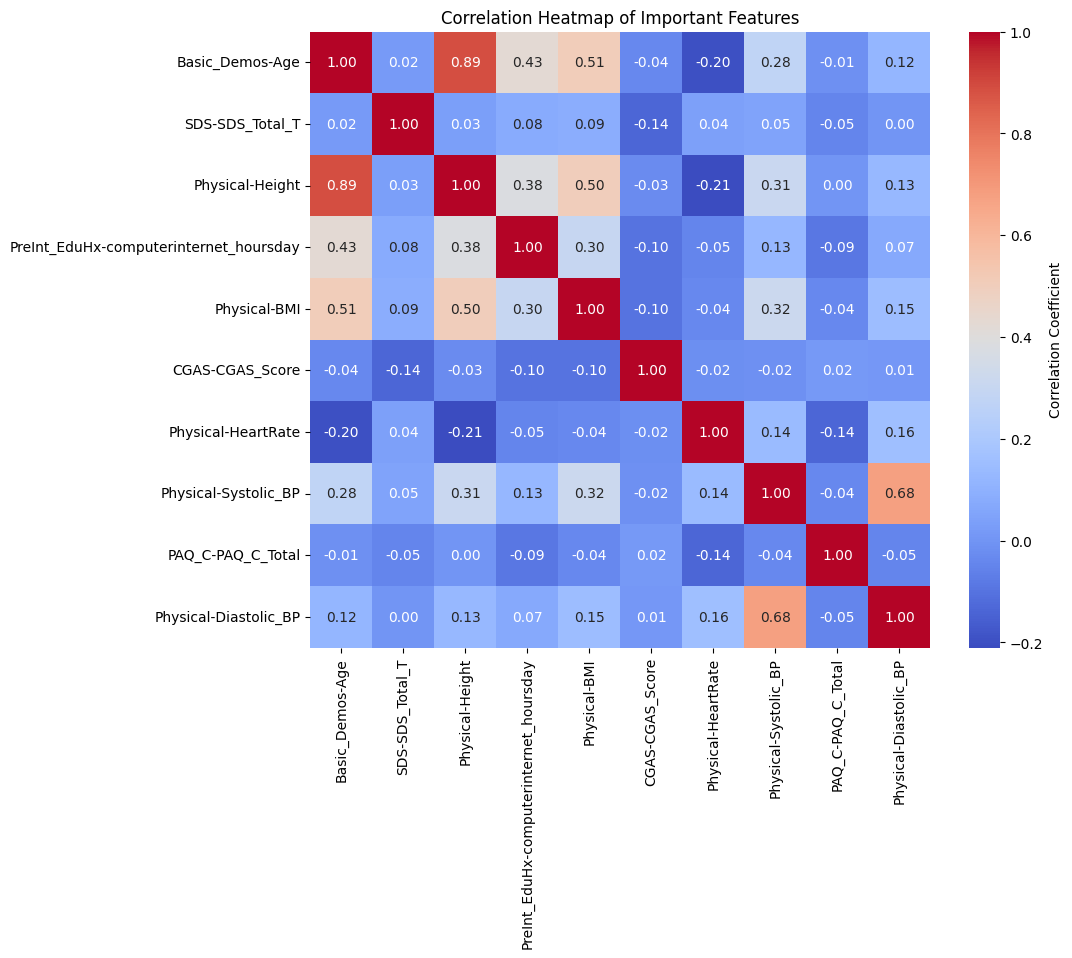

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the dataset to include only the important features
important_features = [
    'Basic_Demos-Age', 'SDS-SDS_Total_T', 'Physical-Height',
    'PreInt_EduHx-computerinternet_hoursday', 'Physical-BMI',
    'CGAS-CGAS_Score', 'Physical-HeartRate', 'Physical-Systolic_BP',
    'PAQ_C-PAQ_C_Total', 'Physical-Diastolic_BP'
]

# Create a new DataFrame with only the important features
important_data = data[important_features]

# Compute the correlation matrix for the important features
corr_matrix = important_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Heatmap of Important Features')
plt.show()


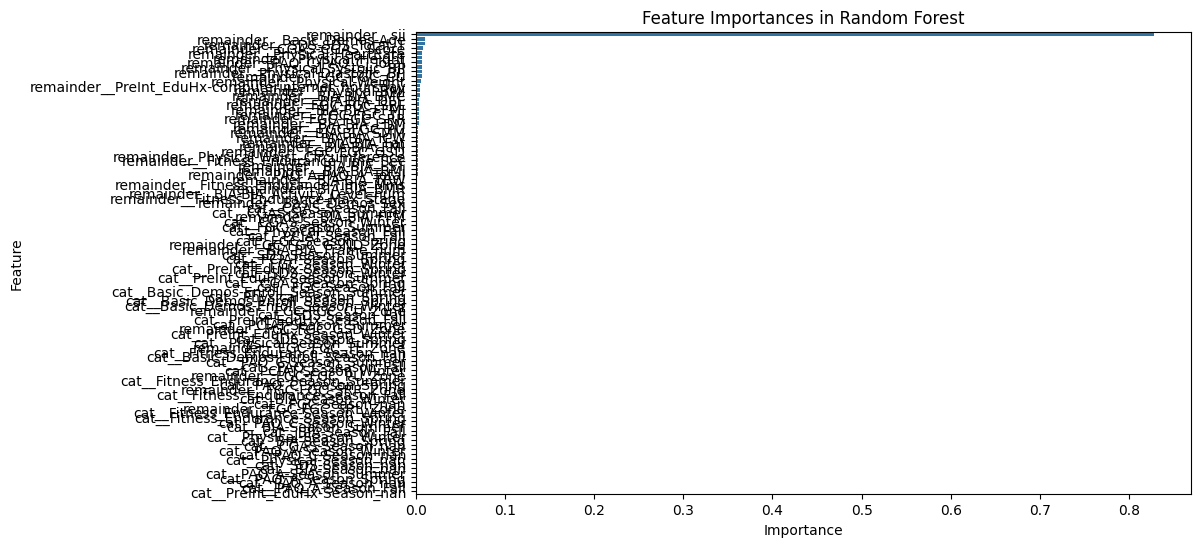

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature names after OneHotEncoding
encoded_features = pipeline.named_steps['preprocessor'].get_feature_names_out()

# Combine encoded categorical feature names and numerical feature names
all_feature_names = np.array(encoded_features)

# Extract feature importances from the trained Random Forest model
rf_model = pipeline.named_steps['rf_model']
importances = rf_model.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[sorted_indices], y=all_feature_names[sorted_indices])
plt.title('Feature Importances in Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


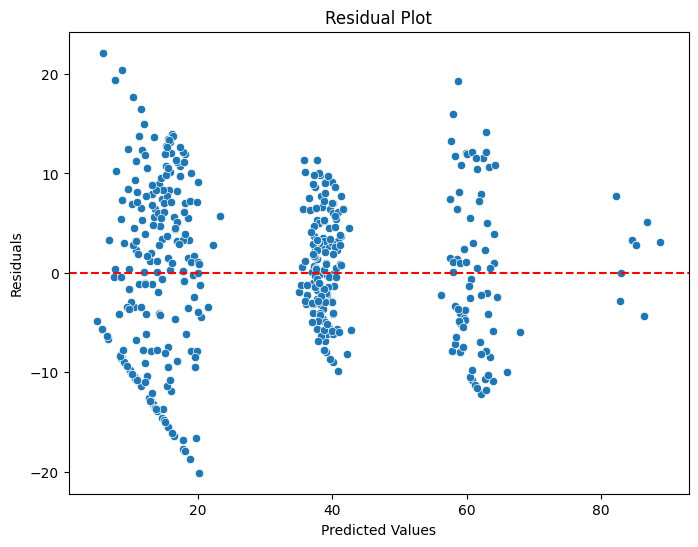

In [32]:
# Scatter plot of residuals
residuals = y_test - predictions

plt.figure(figsize=(8, 6))
sns.scatterplot(x=predictions, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


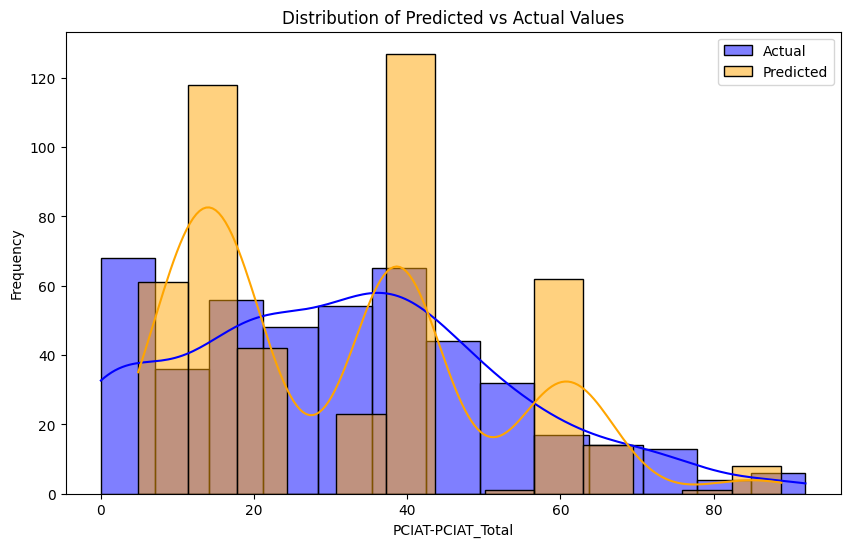

In [33]:
# Plot distribution of predicted vs actual values
plt.figure(figsize=(10, 6))
sns.histplot(y_test, color='blue', label='Actual', kde=True)
sns.histplot(predictions, color='orange', label='Predicted', kde=True)
plt.legend()
plt.title('Distribution of Predicted vs Actual Values')
plt.xlabel('PCIAT-PCIAT_Total')
plt.ylabel('Frequency')
plt.show()


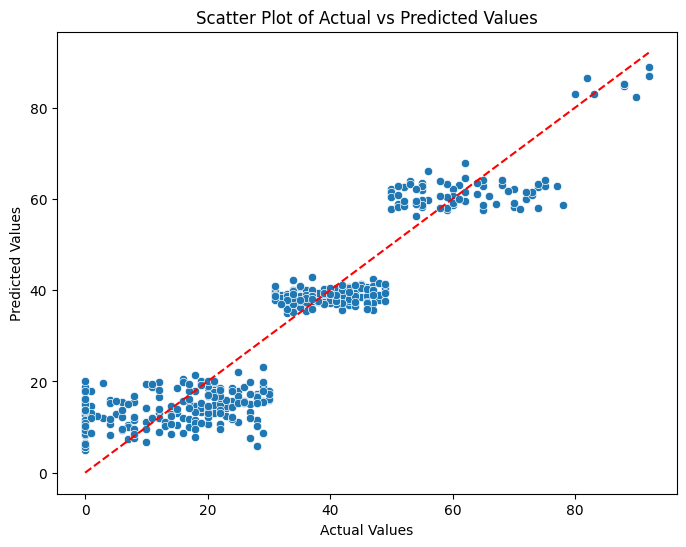

In [34]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Scatter Plot of Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


In [21]:
from sklearn.model_selection import learning_curve

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5)
)

# Calculate mean and std of training/test scores
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Error', color='blue')
plt.plot(train_sizes, test_mean, label='Validation Error', color='orange')

# Plot shaded areas for std
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='orange', alpha=0.2)

plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('MSE')
plt.legend()
plt.show()


KeyboardInterrupt: 

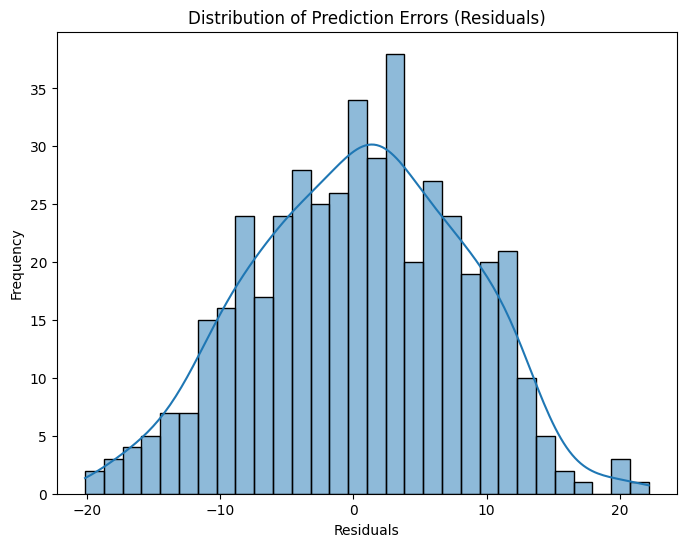

In [35]:
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Distribution of Prediction Errors (Residuals)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


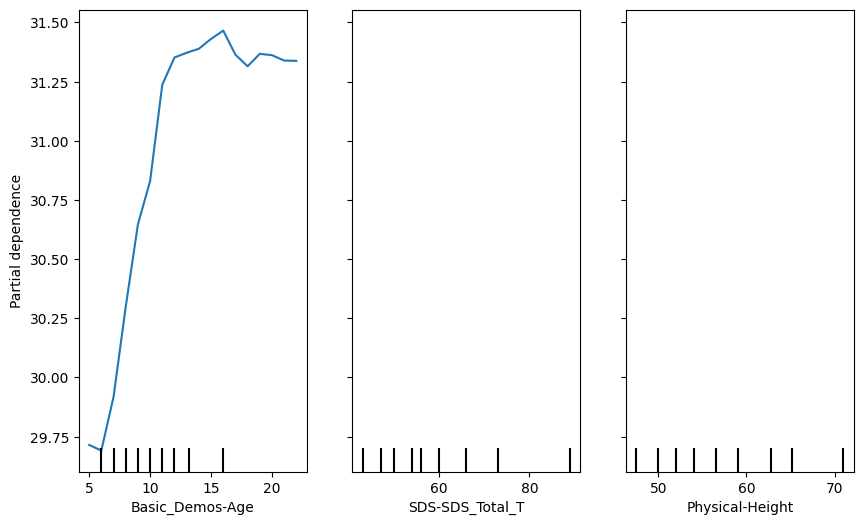

In [36]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# List of features for the Partial Dependence Plot (Numeric features)
numeric_features = [
    'Basic_Demos-Age', 'SDS-SDS_Total_T', 'Physical-Height',
    'PreInt_EduHx-computerinternet_hoursday', 'Physical-BMI',
    'CGAS-CGAS_Score', 'Physical-HeartRate',
    'Physical-Systolic_BP', 'PAQ_C-PAQ_C_Total', 'Physical-Diastolic_BP'
]

# Ensure all features are numeric (already confirmed to be numeric)
top_3_numeric_features = numeric_features[:3]  # Use top 3 important numeric features

# Get the indices of the top 3 numeric features in the original feature set
top_3_feature_indices = [features.columns.get_loc(col) for col in top_3_numeric_features]

# Generate partial dependence plot for the top 3 important numeric features
fig, ax = plt.subplots(figsize=(10, 6))
PartialDependenceDisplay.from_estimator(
    pipeline,
    X_train,
    features=top_3_feature_indices,  # Use the column indices of the top 3 numeric features
    grid_resolution=50,
    ax=ax
)
plt.show()
